# Commodity Price Models

#### Shea Targgart

CBE40455 Final Project  
December 14, 2017

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import datetime


In [3]:
!pip install pandas-datareader

In [4]:
from pandas_datareader import data, wb

In [5]:
from scipy.stats import norm

In [6]:
import requests

def get_symbol(symbol):
    """
    get_symbol(symbol) uses Yahoo to look up a stock trading symbol and 
    return a description.
    """
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    result = requests.get(url).json()
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

symbol = 'KOL'

# end date is today
end = datetime.datetime.today().date()
start = end-datetime.timedelta(3*365)

# get stock price data
S = data.DataReader(symbol,"yahoo",start,end)['Adj Close']

rlin = (S - S.shift(1))/S.shift(1)
rlog = np.log(S/S.shift(1))

rlin = rlin.dropna()
rlog = rlog.dropna()

print('Linear Returns')
mu,sigma = norm.fit(rlin)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(mu,100*252*mu))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigma,100*np.sqrt(252)*sigma))
print()
print('Log Returns')
nu,sigma = norm.fit(rlog)
print('   nu = {0:12.8f}  (annualized = {1:.2f}%)'.format(nu,100*252*nu))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigma,100*np.sqrt(252)*sigma))

Linear Returns
   mu =   0.00024790  (annualized = 6.25%)
sigma =   0.01590055  (annualized = 25.24%)

Log Returns
   nu =   0.00012156  (annualized = 3.06%)
sigma =   0.01589385  (annualized = 25.23%)


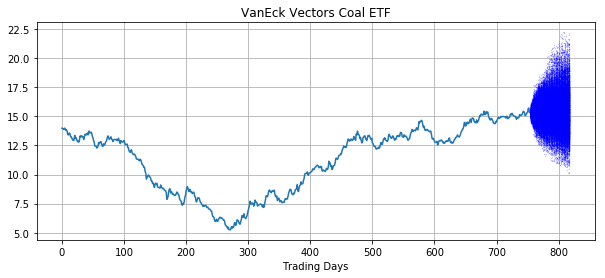

In [7]:
# Brownian motion
N = 1000
T = 63
dt = 1

plt.figure(figsize=(10,4))
plt.plot(S.values)
plt.title(get_symbol(symbol))
plt.xlabel('Trading Days')

Slog = []  # log of final values
for n in range(0,N):
    P = S[-1]       # returns the last price in the sequence
    k = len(S)
    Plog = []
    tlog = []
    for t in range(len(S)+1,len(S)+T+1):
        Z = norm.rvs()
        P += P*(mu*dt + sigma*np.sqrt(dt)*Z)
        Plog.append(P)
        tlog.append(t)
    plt.plot(tlog,Plog,'b.',ms=0.4,alpha=0.5)
    Slog.append(P)

plt.grid()

In [8]:
M=np.mean(S)
print(M)

11.28434275862068


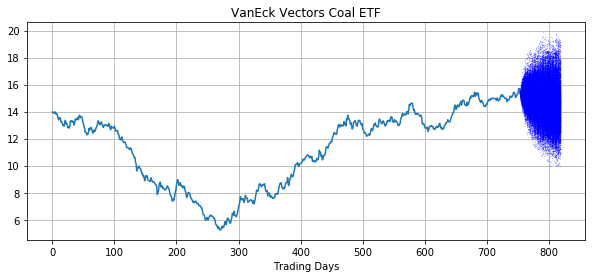

In [9]:
# Mean reversion
N = 1000
T = 63
dt = 1

plt.figure(figsize=(10,4))
plt.plot(S.values)
plt.title(get_symbol(symbol))
plt.xlabel('Trading Days')

Slog = []  # log of final values
for n in range(0,N):
    P = S[-1]       # returns the last price in the sequence
    k = len(S)
    Plog = []
    tlog = []
    for t in range(len(S)+1,len(S)+T+1):
        Z = norm.rvs()
        P += P*(mu*(M-P)*dt + sigma*np.sqrt(dt)*Z)
        Plog.append(P)
        tlog.append(t)
    plt.plot(tlog,Plog,'b.',ms=0.4,alpha=0.5)
    Slog.append(P)

plt.grid()

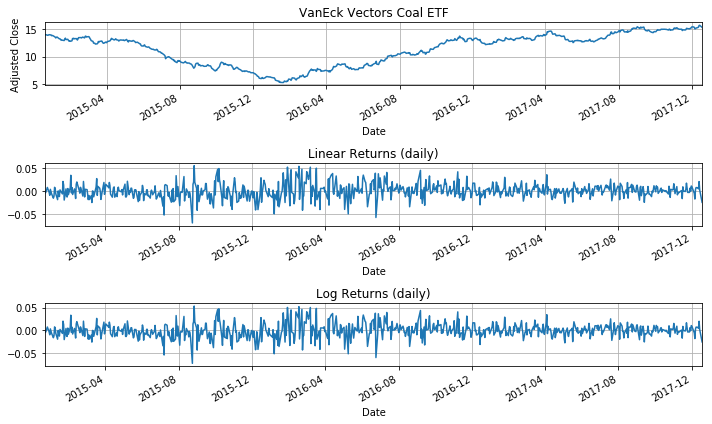

In [10]:
symbol = 'KOL'

# end date is today
end = datetime.datetime.today().date()

# start date is three years prior
start = end-datetime.timedelta(3*365)

# get stock price data
S = data.DataReader(symbol,"yahoo",start,end)['Adj Close']
rlin = (S - S.shift(1))/S.shift(1)
rlog = np.log(S/S.shift(1))

rlin = rlin.dropna()
rlog = rlog.dropna()

# plot data
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
S.plot(title=get_symbol(symbol))
plt.ylabel('Adjusted Close')
plt.grid()

plt.subplot(3,1,2)
rlin.plot()
plt.title('Linear Returns (daily)')
plt.grid()
plt.tight_layout()

plt.subplot(3,1,3)
rlog.plot()
plt.title('Log Returns (daily)')
plt.grid()
plt.tight_layout()

As seen above, the Brownian motion model has a much greater tendency to project a large increase in price. The mean reversion model shows a much smaller range of projected prices that trends back toward the mean vlaue of the time period. For stocks with low volatility, the mean reversion model will likely produce a better estimate for future prices while the brownian motion model will produce better results for stocks that are trending in one direction overall. 